<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/MLProblems_6June2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1196oBY49iRMS96n2zk5y15Ezaa4yE_C3?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

# lets first generate a dataset of N points this time
np.random.seed(1)
N = 100
X = np.random.rand(N,1)*1.8
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(N,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 30% test set

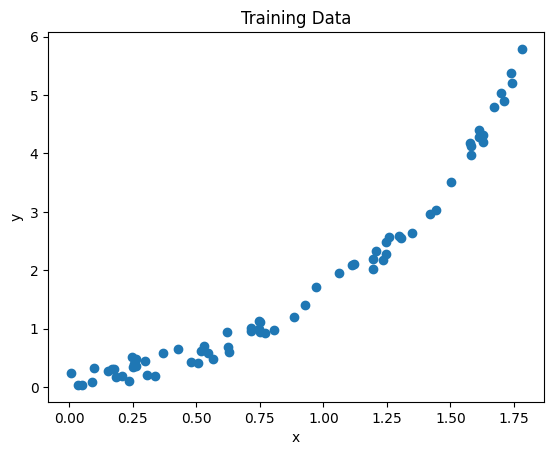

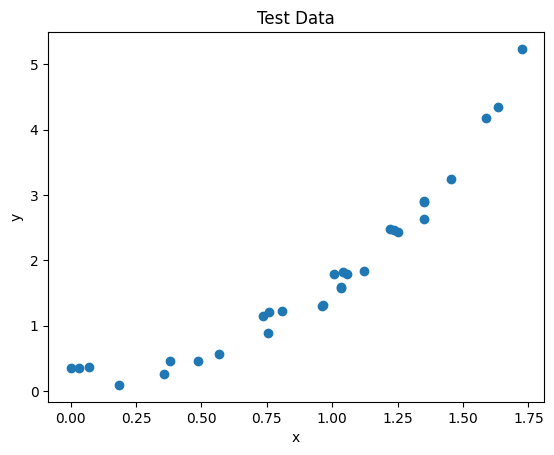

In [ ]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
#from math import log

degree = 50 # max number of number of degrees
train_scores = []
test_scores = []

for i in range(1, degree+1): # 1 to 50

    poly = PolynomialFeatures(i)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    #standardization
    scaler = StandardScaler()
    scaler.fit(X_poly_train) # using parameters from training data to scale both train and test data
    X_poly_scaled_train = scaler.transform(X_poly_train)
    X_poly_scaled_test = scaler.transform(X_poly_test)

    #training
    model = LinearRegression()
    model.fit(X_poly_scaled_train, y_train)

    #prediction
    output_train = model.predict(X_poly_scaled_train)
    output_test = model.predict(X_poly_scaled_test)

    #scores stores training score of the different polynomial regression models
    train_scores.append(model.score(X_poly_scaled_train, y_train))
    test_scores.append(model.score(X_poly_scaled_test, y_test))

print("Degree corresponding to max R2 score for train data")
max_idx = np.argmax(train_scores)
print(max_idx+1, train_scores[max_idx])
print("Degree corresponding to max R2 score for test data")
max_idx = np.argmax(test_scores)
print(max_idx+1, test_scores[max_idx])

Degree corresponding to max R2 score for train data
37 0.9964012827346578
Degree corresponding to max R2 score for test data
4 0.9896042756055109


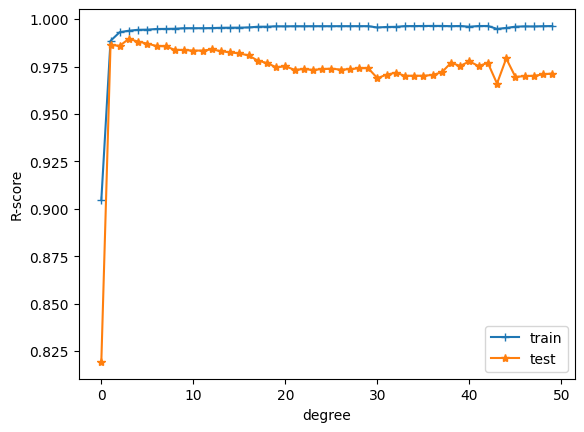

In [ ]:
plt.figure()
plt.plot(train_scores,'+-', label="train")
plt.plot(test_scores,'*-', label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
#plt.ylim((0.99,1.0))
plt.show()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
degrees = 50 # number of data-points
train_scores = []
test_scores = []
coeff = []
for d in range(1, degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    coeff.append(polyreg_scaled.steps[2][1].coef_)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

print("Degree corresponding to max R2 score for train data")
max_idx = np.argmax(train_scores)
print(max_idx+1, train_scores[max_idx])
print(coeff[max_idx])
print("Degree corresponding to max R2 score for test data")
max_idx = np.argmax(test_scores)
print(max_idx+1, test_scores[max_idx])
print(coeff[max_idx])

Degree corresponding to max R2 score for train data
37 0.9964012827346578
[[ 4.28395809e+11  5.68140105e+01 -6.80045869e+03  3.11435136e+05
  -7.73802120e+06  1.20488303e+08 -1.26818468e+09  9.42640040e+09
  -5.07136091e+10  1.99404006e+11 -5.69478253e+11  1.14564304e+12
  -1.48800126e+12  8.93555591e+11  4.94094854e+11 -1.08339633e+12
  -5.35835610e+10  9.82869712e+11  6.54765094e+10 -9.01502983e+11
  -2.99618208e+11  7.33525449e+11  6.22907732e+11 -3.94235614e+11
  -8.24779578e+11 -1.07041177e+11  7.38716918e+11  5.88148189e+11
  -3.58982873e+11 -8.40566477e+11 -1.17393471e+11  8.09507925e+11
   5.00797718e+11 -7.56331155e+11 -6.29744968e+11  1.17734176e+12
  -5.86399538e+11  1.01508383e+11]]
Degree corresponding to max R2 score for test data
4 0.9896042756055109
[[ 0.         -0.15451456  3.13494763 -4.07752937  2.76140243]]


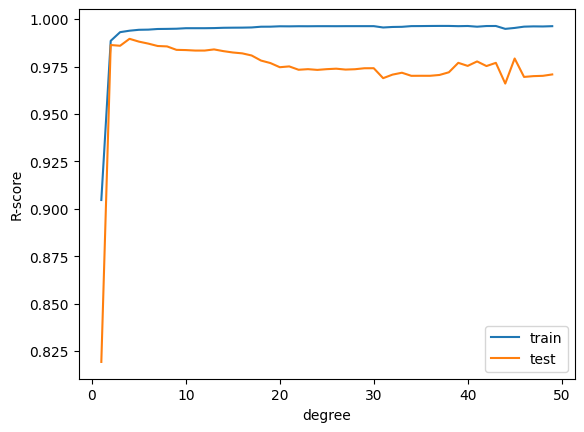

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline
degrees = 50 # number of data-points
train_scores = []
test_scores = []
coeff = []
for d in range(1, degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Ridge(alpha=1.0))
    polyreg_scaled.fit(X_train, y_train)
    coeff.append(polyreg_scaled.steps[2][1].coef_)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

print("Degree corresponding to max R2 score for train data")
max_idx = np.argmax(train_scores)
print(max_idx+1, train_scores[max_idx])
print(coeff[max_idx])
print("Degree corresponding to max R2 score for test data")
max_idx = np.argmax(test_scores)
print(max_idx+1, test_scores[max_idx])
print(coeff[max_idx])

Degree corresponding to max R2 score for train data
49 0.993913908449191
[[ 0.00000000e+00  4.31059138e-01  4.17155176e-01  3.05618821e-01
   1.97168959e-01  1.17856380e-01  6.70641520e-02  3.74397232e-02
   2.17074462e-02  1.43533651e-02  1.16346717e-02  1.11762822e-02
   1.15571026e-02  1.19856331e-02  1.20693635e-02  1.16586571e-02
   1.07443023e-02  9.39200357e-03  7.70164070e-03  5.78282140e-03
   3.74096688e-03  1.67007381e-03 -3.50397231e-04 -2.25617168e-03
  -3.99742116e-03 -5.53731119e-03 -6.85025423e-03 -7.92011643e-03
  -8.73851790e-03 -9.30329745e-03 -9.61717069e-03 -9.68658502e-03
  -9.52076111e-03 -9.13090326e-03 -8.52955806e-03 -7.73010065e-03
  -6.74632875e-03 -5.59214671e-03 -4.28132370e-03 -2.82731246e-03
  -1.24311712e-03  4.58799812e-04  2.26657921e-03  4.16900256e-03
   6.15551017e-03  8.21620475e-03  1.03418439e-02  1.25238244e-02
   1.47541610e-02  1.70254603e-02]]
Degree corresponding to max R2 score for test data
4 0.9879924162619371
[[0.         0.3622475  0.3

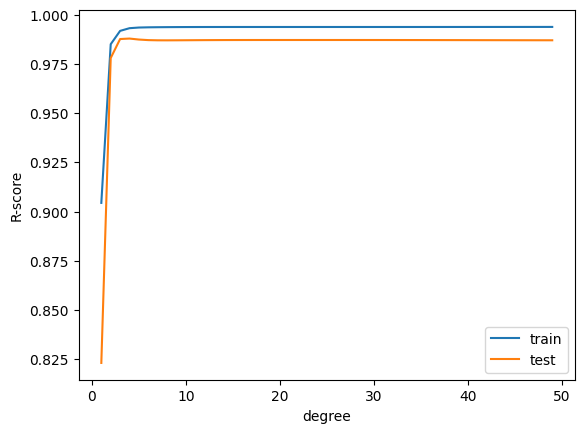

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.pipeline import make_pipeline

degrees = 50 # number of data-points
train_scores = []
test_scores = []
for d in range(1, degrees):
    polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=0.5))
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

print("Degree corresponding to max R2 score for train data")
max_idx = np.argmax(train_scores)
print(max_idx+1, train_scores[max_idx])
print("Degree corresponding to max R2 score for test data")
max_idx = np.argmax(test_scores)
print(max_idx+1, test_scores[max_idx])

Degree corresponding to max R2 score for train data
3 0.8969780788222728
Degree corresponding to max R2 score for test data
3 0.8991796035295907


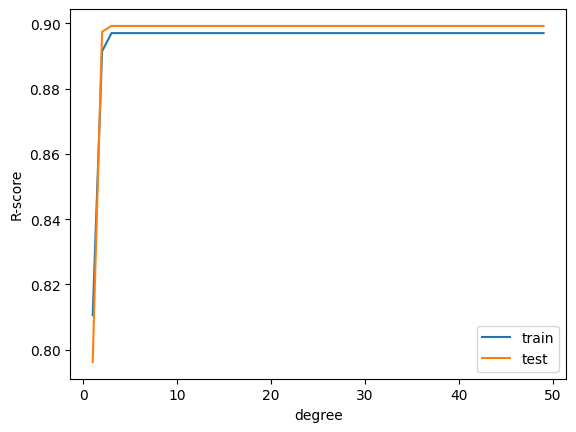

In [ ]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()

R2 score for train data =  0.9962676358101561
R2 score for test data =  0.970820097728878
coefficients =  [3.02830413e+01 1.22054609e-09 1.57053278e-07 7.26040168e-06
 1.78881529e-04 2.74132856e-03 2.82603089e-02 2.04820167e-01
 1.06876283e+00 4.04588109e+00 1.09944451e+01 2.05890288e+01
 2.35735539e+01 9.08431711e+00 1.37219164e+01 1.46806525e+01
 8.76433563e+00 1.25160732e+01 1.21848180e+01 1.05911547e+01
 1.35734034e+01 3.87659451e-01 1.50974559e+01 9.04379940e+00
 5.90012699e+00 1.44886129e+01 8.22696026e+00 6.91864751e+00
 1.45573610e+01 9.04519714e+00 4.70866720e+00 1.35870189e+01
 1.17379495e+01 8.55584785e-02 1.09695821e+01 1.55874900e+01
 5.17428988e+00 7.80998420e+00 1.58964485e+01 1.05203637e+01
 3.67118609e+00 1.51491912e+01 1.58095451e+01 4.14642707e+00
 1.69021888e+01 1.46658446e+01 1.34747205e+01 2.18125494e+01
 2.29075808e+01 5.81020150e+00]


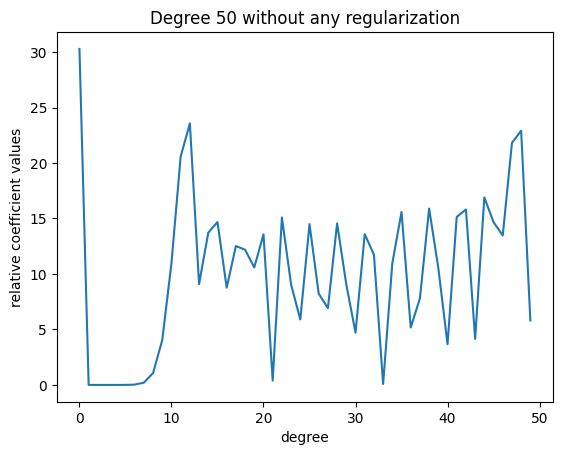

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline

degrees = 50
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), LinearRegression())
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_[0])
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("relative coefficient values")
plt.title("Degree 50 without any regularization")
plt.show()

R2 score for train data =  0.993913908449191
R2 score for test data =  0.9871193250150765
coefficients =  [0.00000000e+00 1.12588830e+02 1.08957238e+02 7.98249296e+01
 5.14987862e+01 3.07830428e+01 1.75165626e+01 9.77892415e+00
 5.66979271e+00 3.74897185e+00 3.03887323e+00 2.91914593e+00
 3.01861285e+00 3.13054123e+00 3.15241085e+00 3.04513799e+00
 2.80631661e+00 2.45310816e+00 2.01160035e+00 1.51042174e+00
 9.77107421e-01 4.36208490e-01 9.15206539e-02 5.89292064e-01
 1.04409101e+00 1.44629665e+00 1.78922574e+00 2.06866427e+00
 2.28242349e+00 2.42993891e+00 2.51191982e+00 2.53005023e+00
 2.48673849e+00 2.38491107e+00 2.22784503e+00 2.01903384e+00
 1.76208133e+00 1.46061920e+00 1.11824384e+00 7.38468978e-01
 3.24691184e-01 1.19834448e-01 5.92010417e-01 1.08890655e+00
 1.60776475e+00 2.14599992e+00 2.70119804e+00 3.27111204e+00
 3.85365620e+00 4.44689947e+00]


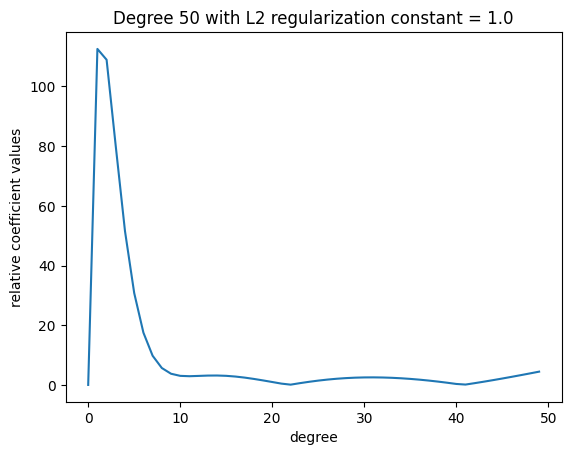

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline

degrees = 50
lambda2 = 1.0
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Ridge(alpha=lambda2))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_[0])
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("relative coefficient values")
title_str = "Degree 50 with L2 regularization constant = " + str(lambda2)
plt.title(title_str)
plt.show()

R2 score for train data =  0.9913421222878686
R2 score for test data =  0.982425130999735
coefficients =  [0.00000000e+00 1.07128324e+02 8.76411160e+01 6.73896026e+01
 5.07982775e+01 3.81067856e+01 2.86175506e+01 2.15520312e+01
 1.62645046e+01 1.22681232e+01 9.21009652e+00 6.83901135e+00
 4.97666401e+00 3.49662914e+00 2.30877553e+00 1.34833826e+00
 5.68288747e-01 6.59685435e-02 5.80277032e-01 9.94283458e-01
 1.32321411e+00 1.57911182e+00 1.77169966e+00 1.90898615e+00
 1.99769120e+00 2.04354780e+00 2.05151723e+00 2.02594421e+00
 1.97067015e+00 1.88911696e+00 1.78435037e+00 1.65912855e+00
 1.51594045e+00 1.35703659e+00 1.18445447e+00 1.00003985e+00
 8.05465103e-01 6.02245102e-01 3.91751323e-01 1.75224407e-01
 4.62145071e-02 2.71553516e-01 4.99880594e-01 7.30375039e-01
 9.62299634e-01 1.19499346e+00 1.42786527e+00 1.66038743e+00
 1.89209035e+00 2.12255730e+00]


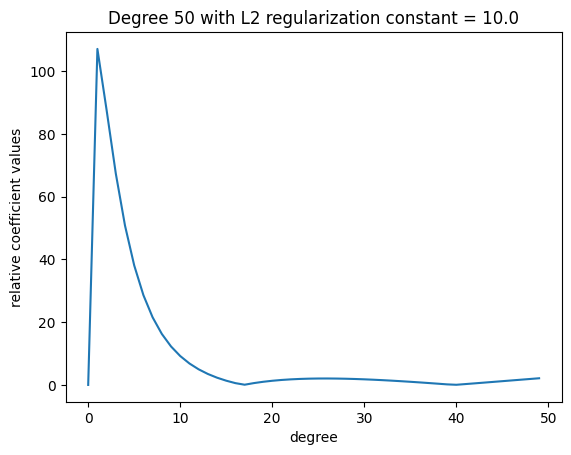

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.pipeline import make_pipeline

degrees = 50
lambda2 = 10.0
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Ridge(alpha=lambda2))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_[0])
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("relative coefficient values")
title_str = "Degree 50 with L2 regularization constant = " + str(lambda2)
plt.title(title_str)
plt.show()

R2 score for train data =  0.9429396111011724
R2 score for test data =  0.9054360363359863
coefficients =  [ 0.         63.17684323 55.84348791 47.77759922 40.71363273 34.82921686
 29.97707815 25.96180415 22.60744071 19.77177158 17.34493476 15.24374154
 13.40561252 11.78338811 10.34126046  9.05171986  7.89331551  6.8490348
  5.90513856  5.0503265   4.2751393   3.57152928  2.93255051  2.35213342
  1.82491926  1.34613686  0.91150947  0.51718309  0.15967023  0.16419507
  0.45729402  0.72225365  0.96147272  1.17714394  1.37127341  1.5456977
  1.70209895  1.84201851  1.96686907  2.07794573  2.17643596  2.26342864
  2.33992238  2.40683302  2.46500051  2.51519521  2.55812361  2.59443367
  2.62471955  2.64952612]


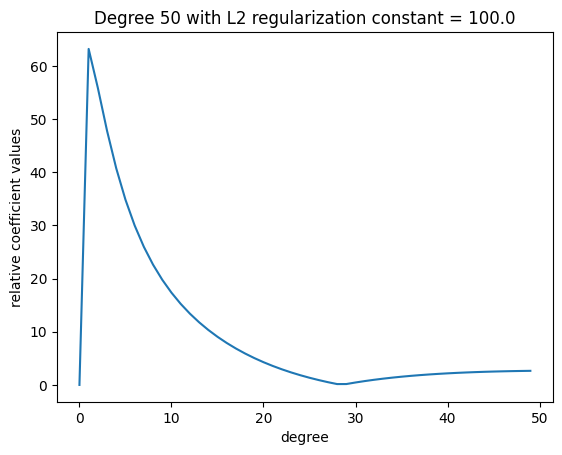

In [ ]:
degrees = 50
lambda2 = 100.0
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Ridge(alpha=lambda2))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_[0])
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("relative coefficient values")
title_str = "Degree 50 with L2 regularization constant = " + str(lambda2)
plt.title(title_str)
plt.show()

R2 score for train data =  0.613200191258289
R2 score for test data =  0.6167501907422731
coefficients =  [  0.           0.         246.82775375 253.17224625   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


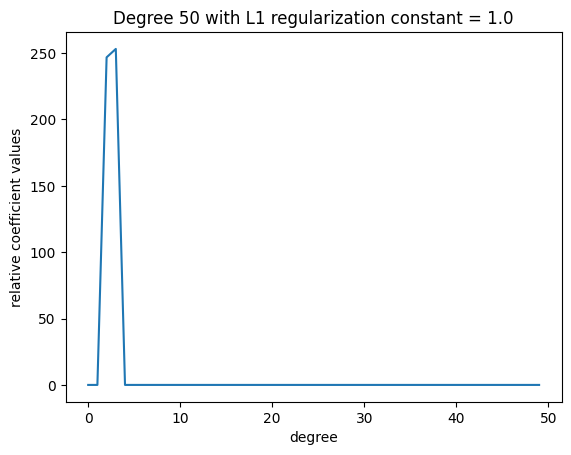

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.pipeline import make_pipeline
degrees = 50
lambda1 = 1.0
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=lambda1))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_)
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("relative coefficient values")
title_str = "Degree 50 with L1 regularization constant = " + str(lambda1)
plt.title(title_str)
plt.show()

R2 score for train data =  0.9893949335543128
R2 score for test data =  0.9866577225428901
coefficients =  [  0.           0.         375.98050623  41.42843079   5.30183775
  17.37065716  26.23261296  23.45830764  10.22764746   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


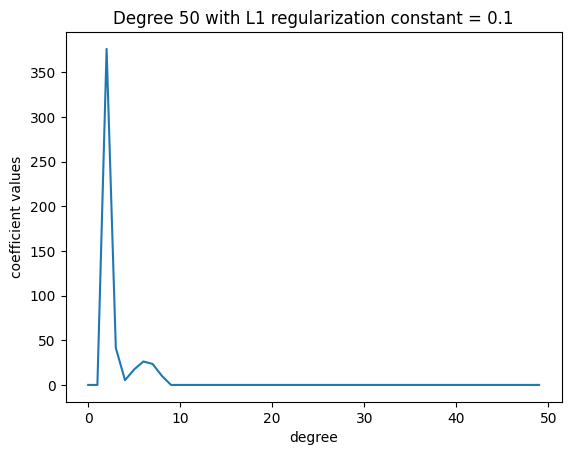

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.pipeline import make_pipeline
degrees = 50
lambda1 = 0.1
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=lambda1))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_)
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("coefficient values")
title_str = "Degree 50 with L1 regularization constant = " + str(lambda1)
plt.title(title_str)
plt.show()

R2 score for train data =  0.8969780083746893
R2 score for test data =  0.8991793553060871
coefficients =  [  0.           0.         248.68057616 251.31942384   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


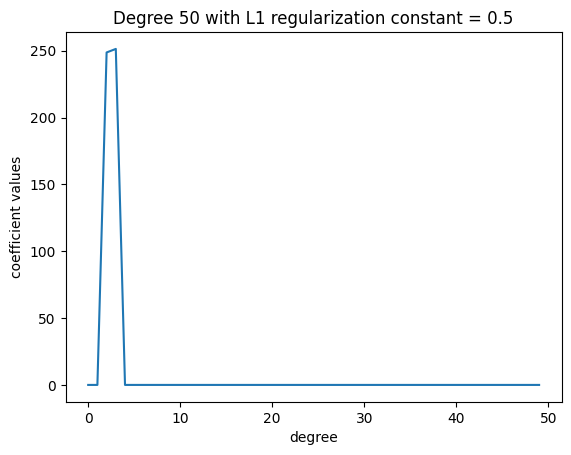

In [ ]:
degrees = 50
lambda1 = 0.5
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=lambda1))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_)
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("coefficient values")
title_str = "Degree 50 with L1 regularization constant = " + str(lambda1)
plt.title(title_str)
plt.show()

R2 score for train data =  0.9941277303639029
R2 score for test data =  0.9892409368482252
coefficients =  [  0.          51.10706422 310.90978793  49.85214913   0.
   0.           0.          13.61085384  29.89915686  24.88400039
  15.44811313   4.28887449   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]


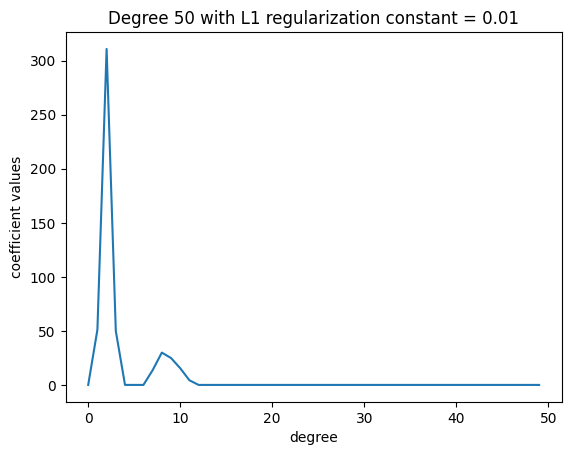

In [ ]:
degrees = 50
lambda1 = 0.01
polyreg_scaled = make_pipeline(PolynomialFeatures(d), StandardScaler(), Lasso(alpha=lambda1))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
test_score = polyreg_scaled.score(X_test, y_test)

print("R2 score for train data = ",train_score)
print("R2 score for test data = ",test_score)
coefficients = abs(polyreg_scaled.steps[2][1].coef_)
#print(coefficients.shape)
val = np.mean(coefficients)
#coefficients /= val/10.0
print("coefficients = ",coefficients/val*10.0)

plt.figure()
plt.plot(list(range(0, degrees)),coefficients/val*10.0)
plt.xlabel("degree")
plt.ylabel("coefficient values")
title_str = "Degree 50 with L1 regularization constant = " + str(lambda1)
plt.title(title_str)
plt.show()